# Regression Analysis & Prediction on Strength of Concrete 

## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

## overview
->This is regression analysis only using Multivariable Regression.<br>
->This is for beginner who want to dive deep into the regression analysis with linear regression and making a valuation tool.

#### workflow:

step 1) Gathering data -> import modules & gathering data
                       
step 2) Clean data -> check for null values(in this case data is alredy perfect)

step 3) Data Exploration -> Univariate Analysis & Bivariate Analysis
                            
step 4) Descriptive Statistics Analysis -> Describing data & Correlation

step 5) Building Model -> LinearRegression

step 6) Model Analysis -> P-value, Multicolinearity(Variation Inflation Factor) & Model simplification(Bayesian Information Criterion)

step 7) Final Model

step 8) Valuation tool to predict the strength

## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import cm 
import seaborn as sns

%matplotlib inline

## Gathering data

In [2]:
df = pd.read_csv('data/concrete_data.csv')
features = df.drop('strength', axis=1)
target = df.strength

$ observation: $ dividing data, dependent data is target, while independent data is features.

## Clean data

In [3]:
df.head(8)

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770


In [4]:
df.isnull().sum()

cement              0
slag                0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
strength            0
dtype: int64

$ Observation: $ no null values in any features of dataset. so, we continue to next step.

## Data exploration

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


$ observation: $ 
no. of Rows: 1030<br>
no. of columns: 9<br>
Data type are all defined properly

## Univariate Analysis

### 1) Strength

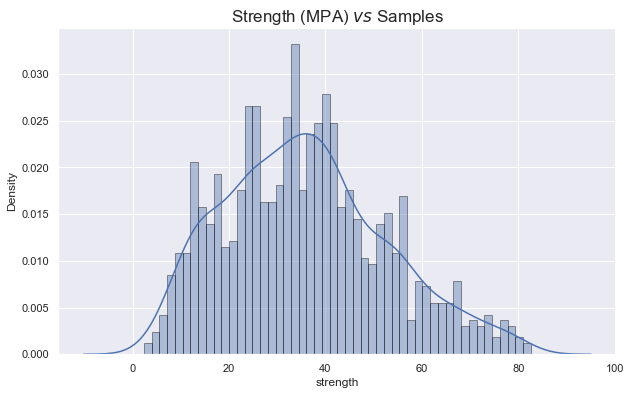

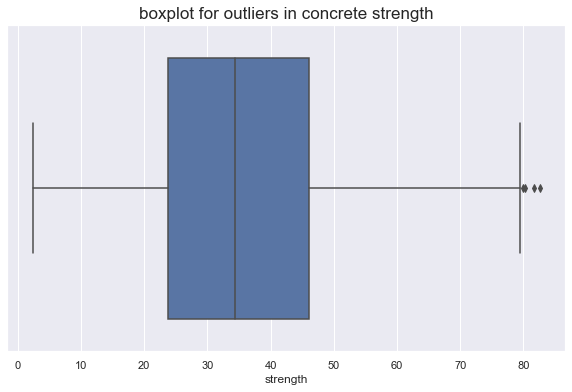

(82.5992248, 0.41692228227018757)

In [6]:
# plotting distplot of Concrete compressice strength
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = target, bins=50, hist_kws={'ec': 'black'})
plt.title('Strength (MPA) $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in concrete strength
plt.figure(figsize=(10,6))
sns.boxplot(x=target)
plt.title('boxplot for outliers in concrete strength', fontsize=17)
plt.show()

target.max(), target.skew()

$ observation: $ distplot shows that distribution has positive skew. <br>
boxplot show the outliers, 82.59 being the furthest outlier.

## 2) Cement

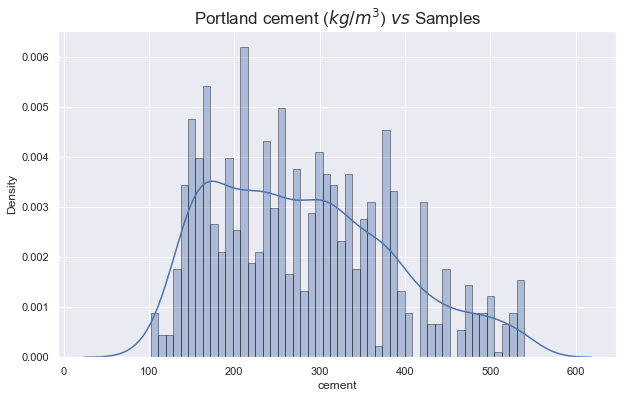

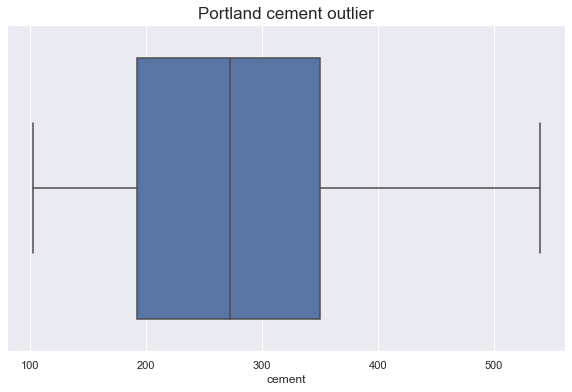

(540.0, 0.5095174325609817)

In [7]:
#plotting distplot for cement
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = features.cement, bins=50, hist_kws={'ec': 'black'})
plt.title('Portland cement ($kg/m^3$) $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in cement
plt.figure(figsize=(10,6))
sns.boxplot(x=features.cement)
plt.title('Portland cement outlier', fontsize=17)
plt.show()

features.cement.max(), features.cement.skew()

$ observation: $ distplot shows that distribution has positive skew. <br>
boxplot show no outliers, 540 being the furthest.

## 3) Slag

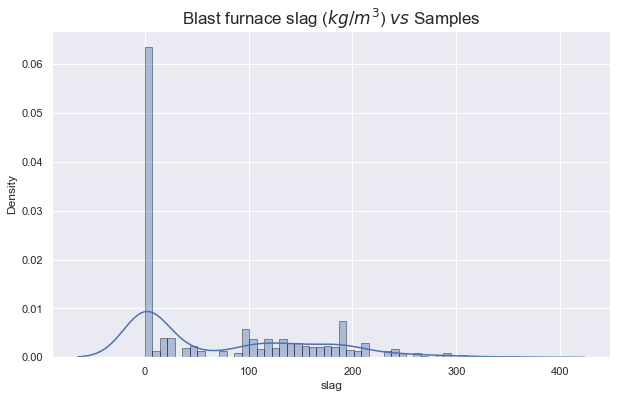

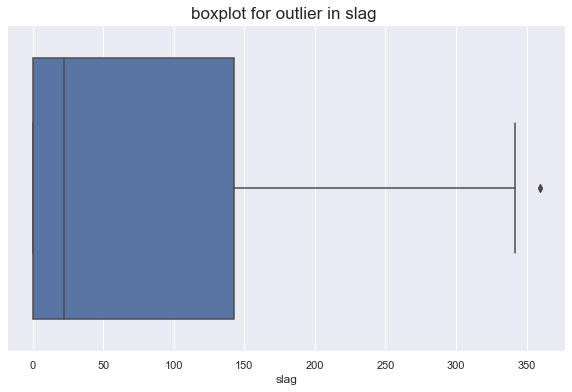

(359.4, 0.8007373534132386)

In [8]:
#plotting distplot for slag
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = features.slag, bins=50, hist_kws={'ec': 'black'})
plt.title('Blast furnace slag ($kg/m^3$) $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in slag
plt.figure(figsize=(10,6))
sns.boxplot(x=features.slag)
plt.title('boxplot for outlier in slag ', fontsize=17)
plt.show()

# furthest data/outlier
features.slag.max(), features.slag.skew()

$ observation: $ distplot shows that distribution has positive skew. <br>
boxplot show the outliers, 359.4 being the furthest.

## 4) Fly ash

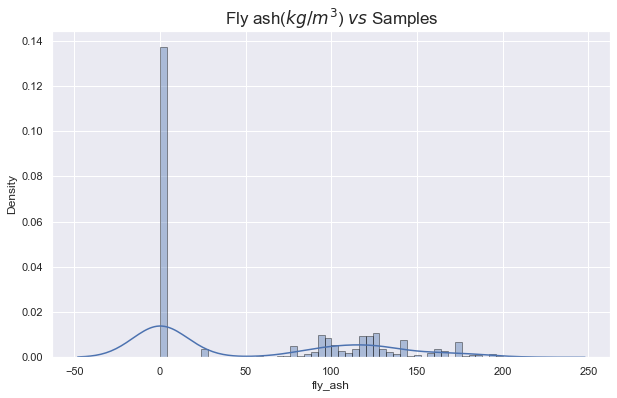

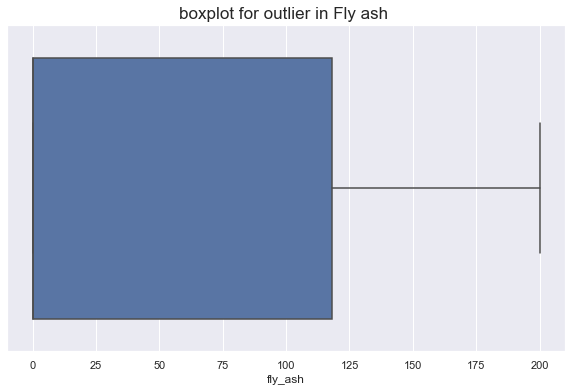

(200.1, 0.5374451101484666)

In [9]:
#plotting distplot for fly ash
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = features.fly_ash, bins=50, hist_kws={'ec': 'black'})
plt.title('Fly ash($kg/m^3$) $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in slag
plt.figure(figsize=(10,6))
sns.boxplot(x=features.fly_ash)
plt.title('boxplot for outlier in Fly ash ', fontsize=17)
plt.show()

features.fly_ash.max(), features.fly_ash.skew()

$ observation: $ distplot shows that distribution has positive skew. <br>
boxplot shows no outliers, 200.1 being the furthest.

## 5) Water

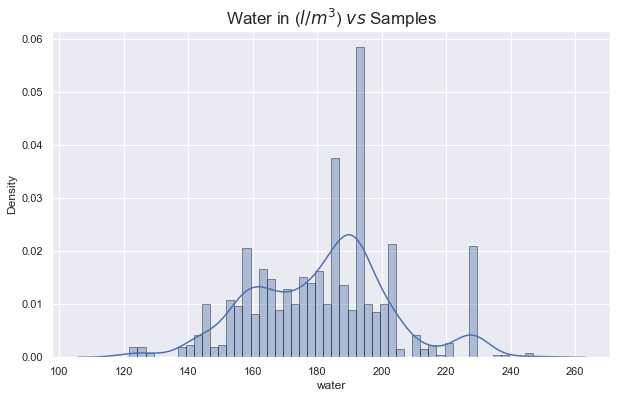

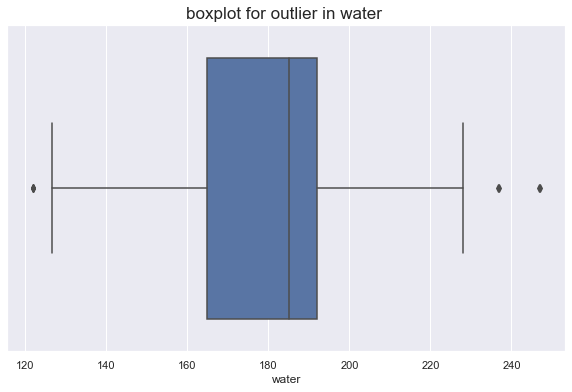

(247.0, 0.07432397541502517)

In [10]:
#plotting distplot for water
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = features.water, bins=50, hist_kws={'ec': 'black'})
plt.title('Water in ($l/m^3$) $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in slag
plt.figure(figsize=(10,6))
sns.boxplot(x=features.water)
plt.title('boxplot for outlier in water ', fontsize=17)
plt.show()

# furthest data/outlier
features.water.max(), features.water.skew()

$ observation: $ distplot shows that distribution has positive skew. <br>
boxplot show the outliers, 247 being the furthest.

## 6) Superplasticizer

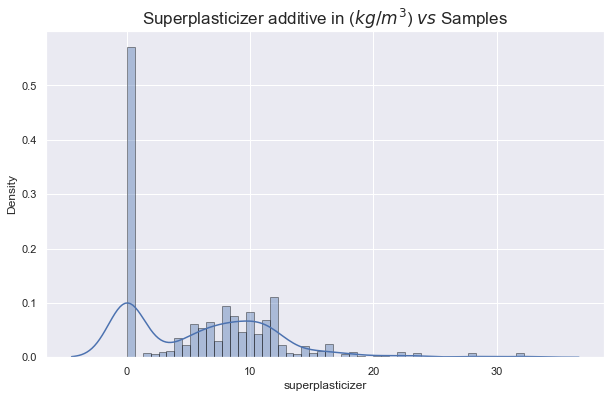

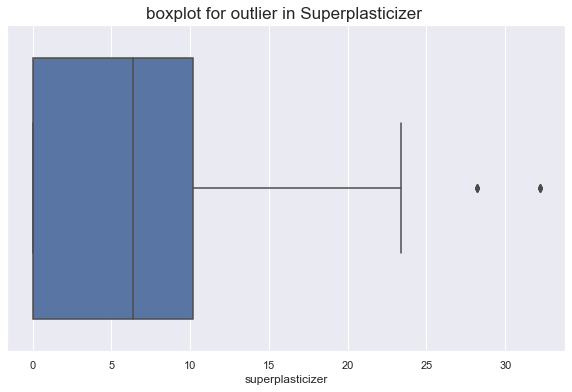

(32.2, 0.9081127314966221)

In [11]:
#plotting distplot for superplasticizer
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = features.superplasticizer, bins=50, hist_kws={'ec': 'black'})
plt.title('Superplasticizer additive in ($kg/m^3$) $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in slag
plt.figure(figsize=(10,6))
sns.boxplot(x=features.superplasticizer)
plt.title('boxplot for outlier in Superplasticizer ', fontsize=17)
plt.show()

# furthest data/outlier
features.superplasticizer.max(), features.superplasticizer.skew()

$ observation: $ distplot shows that distribution has positive skew. <br>
boxplot show the outliers, 32.2 being the furthest.

## 7) Coarse_aggregate

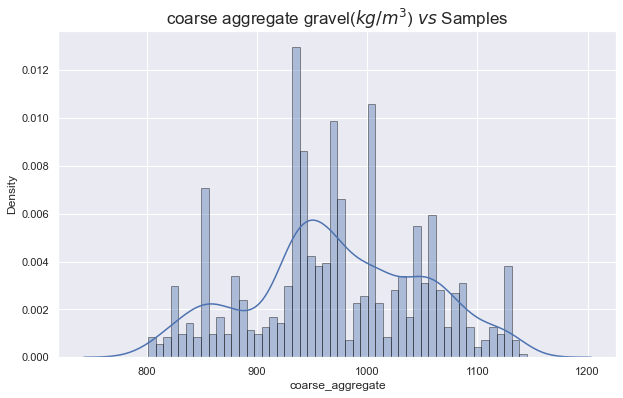

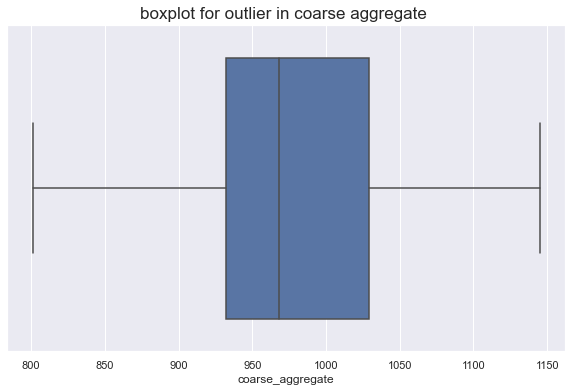

(1145.0, -0.04020640266624772)

In [12]:
#plotting distplot for coarse aggregate
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = features.coarse_aggregate, bins=50, hist_kws={'ec': 'black'})
plt.title('coarse aggregate gravel($kg/m^3$) $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in slag
plt.figure(figsize=(10,6))
sns.boxplot(x=features.coarse_aggregate)
plt.title('boxplot for outlier in coarse aggregate ', fontsize=17)
plt.show()

features.coarse_aggregate.max(), features.coarse_aggregate.skew()

$ observation: $ distplot shows that distribution has negative skew. <br>
boxplot show no outliers, 1145 being the furthest.

## 8) Fine_aggregate

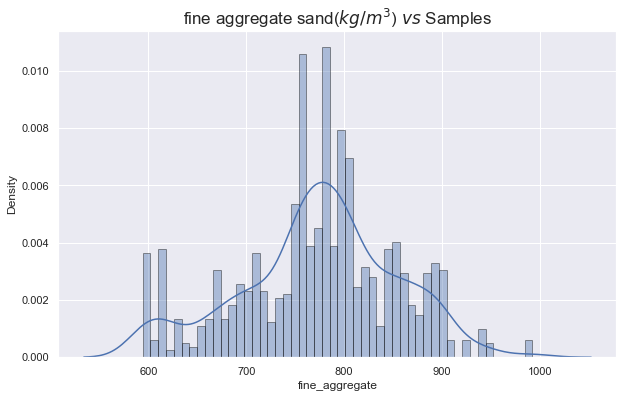

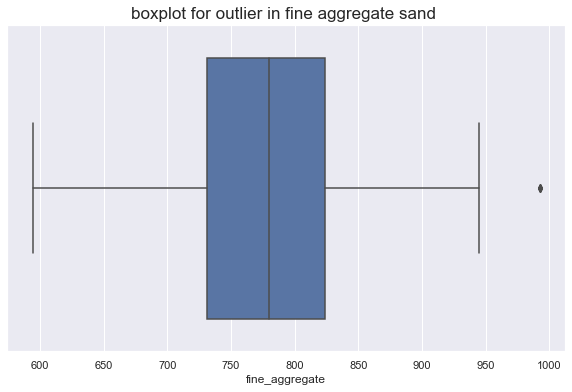

(992.6, -0.2529792974476521)

In [13]:
#plotting distplot for fine aggregate(sand)
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = features.fine_aggregate, bins=50, hist_kws={'ec': 'black'})
plt.title('fine aggregate sand($kg/m^3$) $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in slag
plt.figure(figsize=(10,6))
sns.boxplot(x=features.fine_aggregate)
plt.title('boxplot for outlier in fine aggregate sand ', fontsize=17)
plt.show()

#furthes data/outlier
features.fine_aggregate.max(), features.fine_aggregate.skew()

$ observation: $ distplot shows that distribution has negative skew. <br>
boxplot show the outliers, 992 being the furthest.

## 9) Age

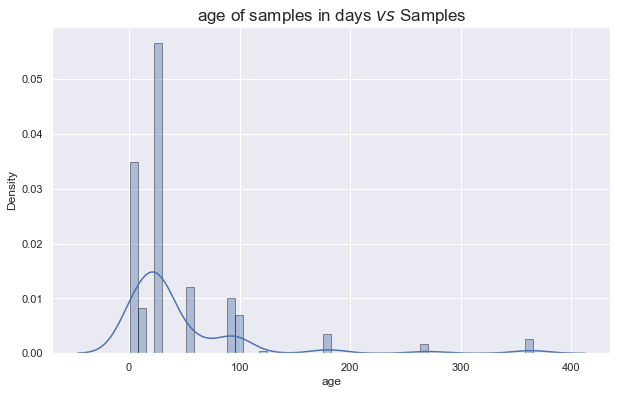

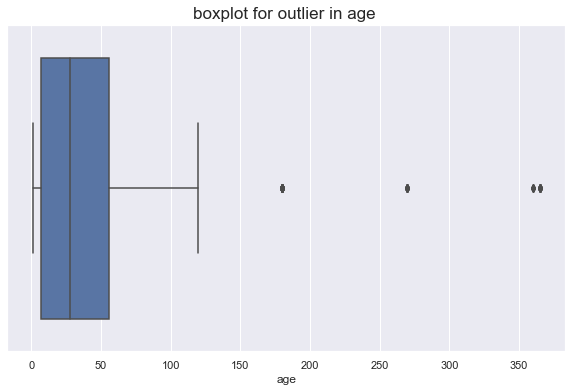

(365, 3.26917740063459)

In [14]:
#plotting distplot for age of the samples in days
plt.figure(figsize = (10,6))
sns.set()
sns.distplot(a = features.age, bins=50, hist_kws={'ec': 'black'})
plt.title('age of samples in days $vs$ Samples', fontsize=17)
plt.show()

# boxplot for seeing outliers in age
plt.figure(figsize=(10,6))
sns.boxplot(x=features.age)
plt.title('boxplot for outlier in age ', fontsize=17)
plt.show()

#furthest data/outlier
features.age.max(), features.age.skew()

$ observation: $ distplot shows that distribution has positive skew. <br>
boxplot show the outliers, 365 being the furthest.

# Descriptive Statistics Analysis
## 1) describe()

In [15]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## 2)correlation

<AxesSubplot:>

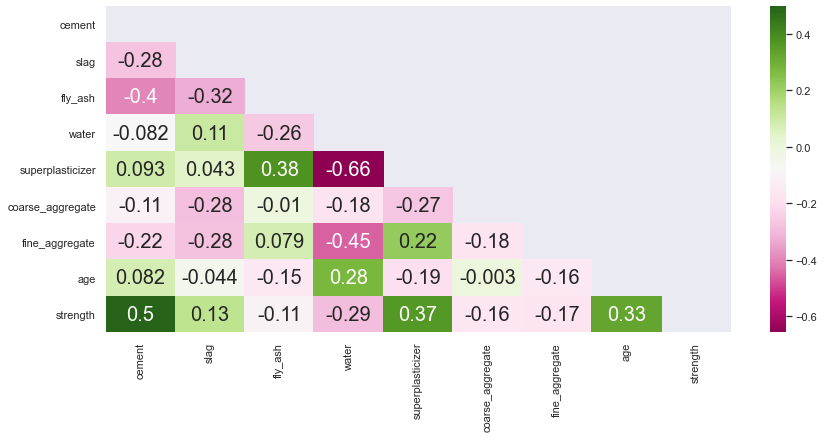

In [16]:
mask = np.zeros_like(df.corr())
triu_indices = np.triu_indices_from(mask)
mask[triu_indices] = True

plt.figure(figsize=(14,6))
sns.heatmap(data=df.corr(), mask=mask, annot=True, annot_kws={'size':20}, cmap = 'PiYG')

$ observation: $
We can see the correlation between all features and target.

## 2) Bivariate analysis
using pairplot

<Figure size 720x432 with 0 Axes>

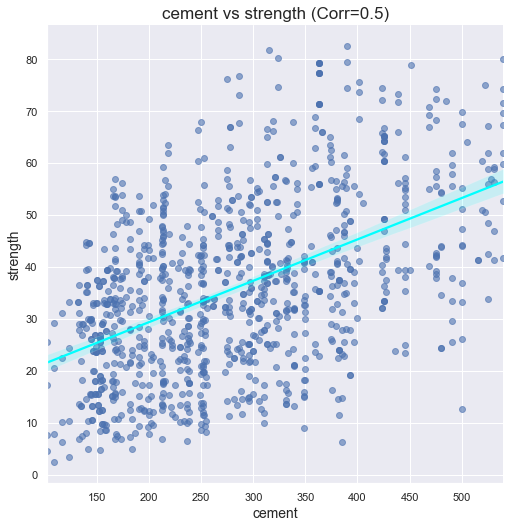

In [17]:
strength_cement_corr = features.cement.corr(target)
plt.figure(figsize=(10,6))
sns.lmplot(x='cement', y='strength', data=df, line_kws = {'color':'cyan'},
           scatter_kws = {'alpha':0.6}, size = 7 )
plt.xlabel('cement', fontsize=14)
plt.ylabel('strength', fontsize=14)
plt.title(f'cement vs strength (Corr={round(strength_cement_corr,2)})', fontsize=17)
plt.show()

$ obsevation:$ strength and cement have positive regression line. i.e. as cement increases stength also increase.

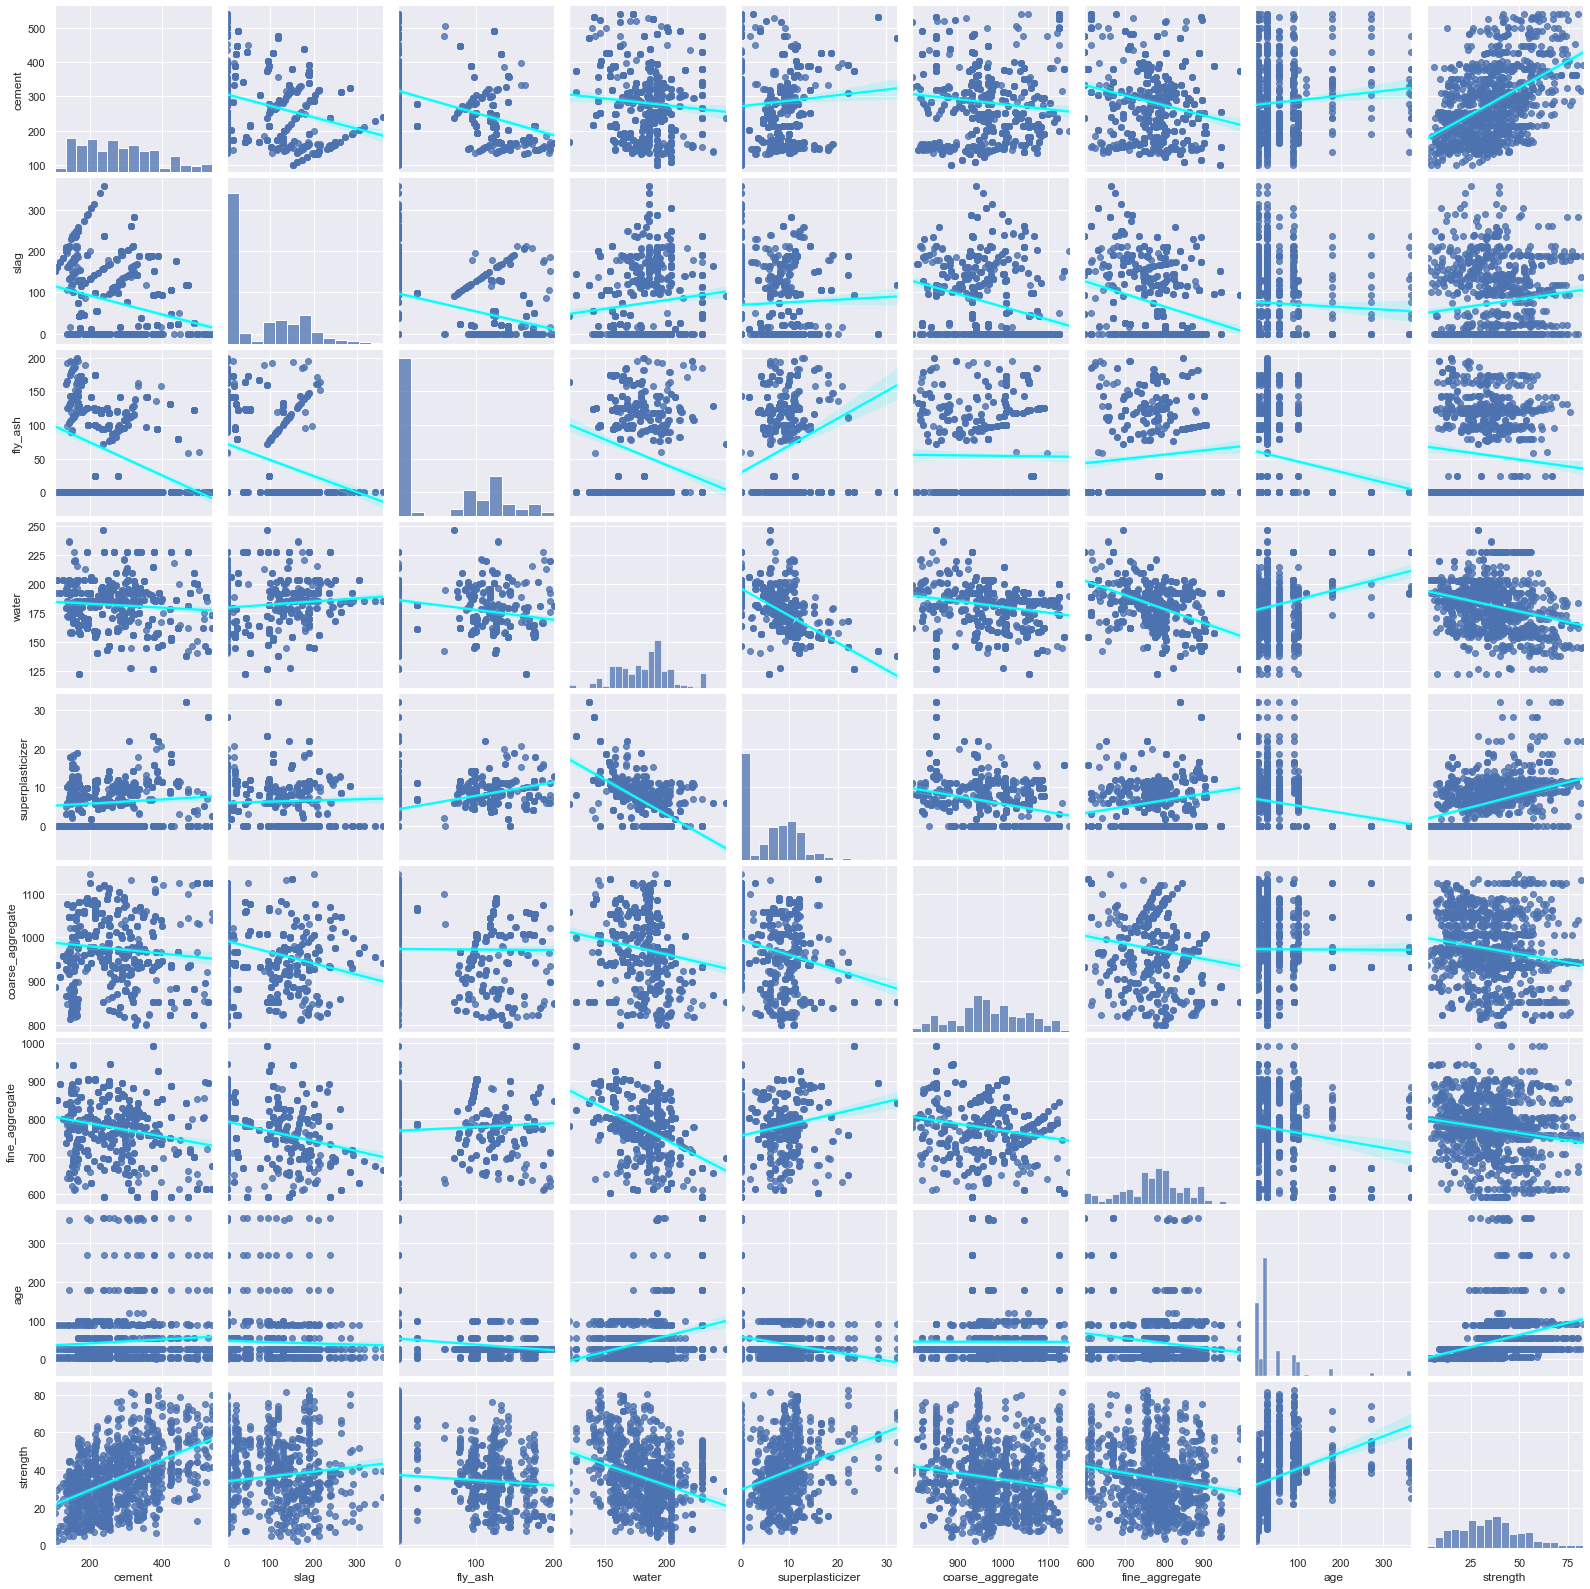

CPU times: user 20.6 s, sys: 249 ms, total: 20.8 s
Wall time: 20.7 s


In [18]:
%%time

sns.pairplot(df, kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

$ obsevation:$ this pairplot show all the regression relation between features,target.

# Building Model

In [19]:
# Train & Test split data
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=10)

# regression
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=X_incl_const)
result = model.fit()

$ obsevation:$ split training data and using regression model

In [20]:
df.strength.skew(), np.log(df.strength).skew()

(0.41692228227018757, -0.8717016316144194)

$observation:$ skew is already very low in original stength data so log transformation for data is not needed.

In [33]:
result.params

const              -28.253541
cement               0.122247
slag                 0.105496
fly_ash              0.092198
water               -0.152494
superplasticizer     0.253150
coarse_aggregate     0.021227
fine_aggregate       0.021940
age                  0.115992
dtype: float64

$ observation:$ these are my $ \beta _0 , \beta _1 , \beta _2 ....\beta _8   $

## Analysing Model
### 1)evaluating pvalue and coefficient

In [21]:
pd.DataFrame({'strength_coef':result.params,'p-values':round(result.pvalues,3)})

,strength_coef,p-values
const,-28.253541,0.348
cement,0.122247,0.000
slag,0.105496,0.000
fly_ash,0.092198,0.000
water,-0.152494,0.001
superplasticizer,0.253150,0.014
coarse_aggregate,0.021227,0.045
fine_aggregate,0.021940,0.069
age,0.115992,0.000


$ obsevation:$ const is intercept.<br>
as optimal p-value is 0.05, only fine_aggregate has more pvalue which show that it has less statistical significance in this model. i.e. maybe removing fine_aggregate should not have that much affect in model

## 2)testing Multicolinearity using VIF

In [22]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=7)
X_incl_const.columns

Index(['const', 'cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

In [23]:
vif =[]
for i in range(len(X_incl_const.columns)):
    s = variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
    vif.append(s)

In [24]:
pd.DataFrame({'vif': vif, 'threshold' : 10}, index=X_incl_const.columns)

,vif,threshold
const,6970.749594,10
cement,7.913282,10
slag,7.476148,10
fly_ash,6.488148,10
water,7.455314,10
superplasticizer,3.013834,10
coarse_aggregate,5.188893,10
fine_aggregate,7.380145,10
age,1.138885,10


If VIF>10, there is strong collinearity and it means that model will not be optimal.
If it is <10, there is not collinearity and is acceptable.

## 3)Model simplification & BIC

In [25]:
# orginal model
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=10)

# regression
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=X_incl_const)
result = model.fit()

org_coeff = pd.DataFrame({'coef': result.params, 'p-value' :round(result.pvalues,2)}, index=X_incl_const.columns)

print(f'the r squared value of original model:{round(result.rsquared,2)}')
print(f'BIC of original model:{result.bic}')

the r squared value of original model:0.62
BIC of original model:6239.465732130577


$observation$: so, in this first model we have used original model without dropping any features.<br>
which shows the r-squared of 0.62 which is not very good for prediction, but
"Henseler (2009) proposed a rule of thumb for acceptable R2 with 0.75, 0.50, and 0.25 are described as substantial, 
moderate and weak respectively." <br>
so, this model is moderate for prediction, and has bayesian information criterion as 6239.46. <br>
lower the bic better the model.

In [26]:
# model dropping fine_aggregate
transformed_feature = features.drop('fine_aggregate', axis=1)
X_train, X_test, y_train, y_test = train_test_split(transformed_feature, target, train_size=0.8, random_state=10)

# regression
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=X_incl_const)
result = model.fit()

finagg_coeff = pd.DataFrame({'coef': result.params, 'p-value' :round(result.pvalues,2)}, index=X_incl_const.columns)

print(f'the r squared value of original model:{round(result.rsquared,2)}')
print(f'BIC of original model:{result.bic}')

the r squared value of original model:0.62
BIC of original model:6236.085076025845


$observation$: so, in this second model we have dropped fine_aggregate, because its has less statistic significance in this model according to p-value of '0.069' from table above. <br>
->which shows the r-squared of 0.62. so, this model is moderate for prediction, and has bayesian information criterion as 6236.46. <br>
->lower the bic better the model.so, this model is better optimized than original model as it uses less feature but gives similar prediction.

In [27]:
# model dropping fine_aggregate, coarse_aggregate, superplasticizer
transformed_feature = features.drop(['fine_aggregate','coarse_aggregate','superplasticizer'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(transformed_feature, target, train_size=0.8, random_state=10)

# regression
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=X_incl_const)
result = model.fit()

fine_coarse_sup_coeff = pd.DataFrame({'coef': result.params, 'p-value' : round(result.pvalues,2)}, index=X_incl_const.columns)

print(f'the r squared value of original model:{round(result.rsquared,2)}')
print(f'BIC of original model:{result.bic}')

the r squared value of original model:0.62
BIC of original model:6227.4117994585295


$observation$: so, in this third model we have dropped fine_aggregate, coarse_aggregate, superplasticizer<br>
which shows the r-squared of 0.62. so, this model is moderate for prediction, and has bayesian information criterion as 6227.41. <br>
lower the bic better the model.so, this model is better optimized than second model as it uses less feature but gives similar prediction.

In [28]:
frame = [org_coeff,finagg_coeff, fine_coarse_sup_coeff]
pd.concat(frame, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,-28.253541,0.35,23.454411,0.02,35.493105,0.0
cement,0.122247,0.00,0.107162,0.00,0.109949,0.0
slag,0.105496,0.00,0.087573,0.00,0.090757,0.0
fly_ash,0.092198,0.00,0.071611,0.00,0.079239,0.0
water,-0.152494,0.00,-0.219911,0.00,-0.258795,0.0
superplasticizer,0.253150,0.01,0.221352,0.03,NaN,NaN
coarse_aggregate,0.021227,0.05,0.005216,0.37,NaN,NaN
fine_aggregate,0.021940,0.07,NaN,NaN,NaN,NaN
age,0.115992,0.00,0.115023,0.00,0.115708,0.0


# final model

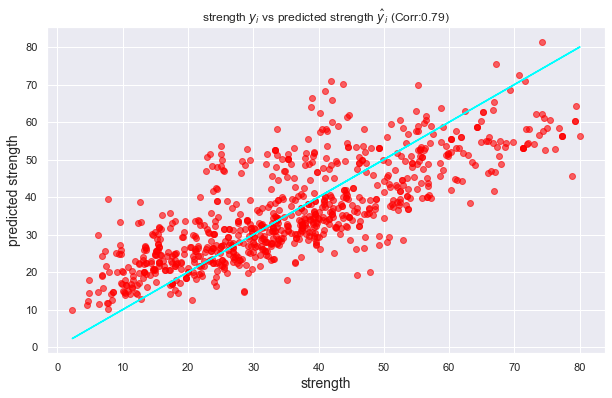

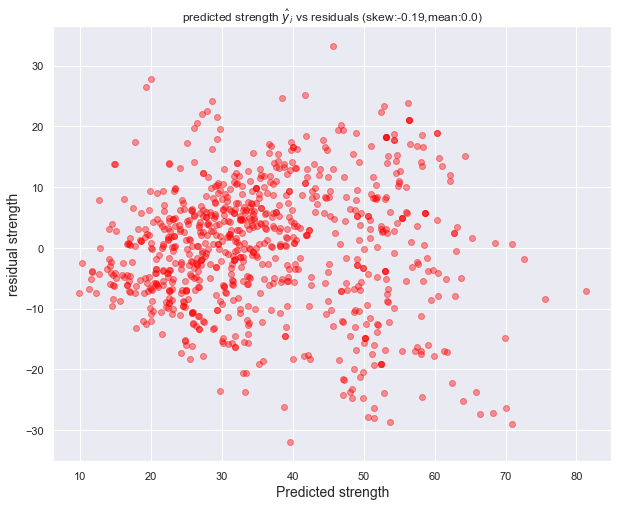

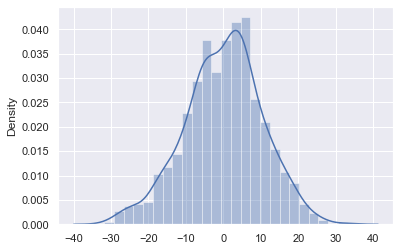

In [29]:
# modified model:simplified(dropping three features)
transformed_feature = features.drop(['fine_aggregate','coarse_aggregate','superplasticizer'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(transformed_feature, target, train_size=0.8, random_state=10)

# regression
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=X_incl_const)
result = model.fit()

# plotting actual value with predicted value
corr = round(y_train.corr(result.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=result.fittedvalues, alpha=0.6, color='#ff0000')
plt.plot(y_train, y_train, color = 'cyan')
plt.xlabel('strength', fontsize=14)
plt.ylabel('predicted strength', fontsize=14)
plt.title(f'strength $y _i$ vs predicted strength $\hat y_i$ (Corr:{corr})')
plt.show()

skew = round(result.resid.skew(),2)
mean = round(result.resid.mean(),2)
#plotting predicted strength vs residual
plt.figure(figsize=(10,8))
plt.scatter(x=result.fittedvalues, y=result.resid, alpha=0.4, color='#ff0000')
plt.xlabel('Predicted strength', fontsize=14)
plt.ylabel('residual strength', fontsize=14)
plt.title(f'predicted strength $\hat y_i$ vs residuals (skew:{skew},mean:{mean})')
plt.show()

sns.distplot(result.resid)
plt.show

mod_model_mse = result.mse_resid
mod_model_rsquared = result.rsquared

$observation:$ here in first figure predicted stength and actual strength have 0.79 correlation and positive regression.<br>
-> figure two shows that predicted and residual are the points looks randomly distributed, many point are centered to 0 in y-axis , distribution is cloud distribution meaning doesn't show any type of pattern in data except some outliers pattern and is little compact.<br>
-> figure three show distplot of residuals which is normal and doesn't have big skew

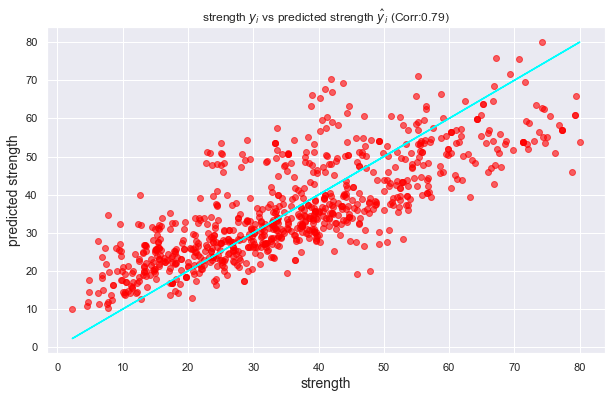

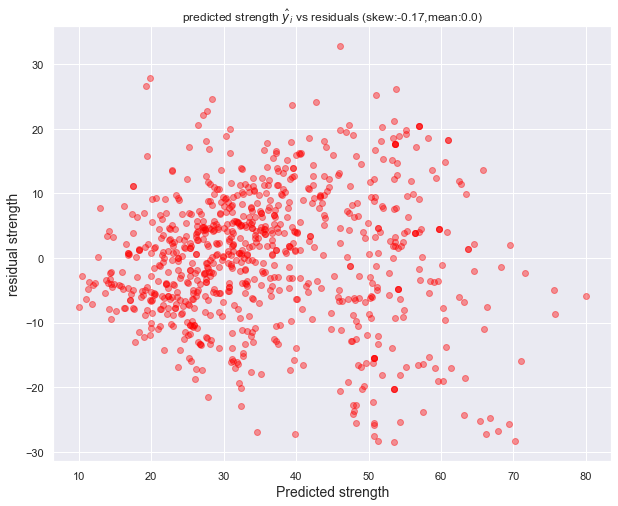

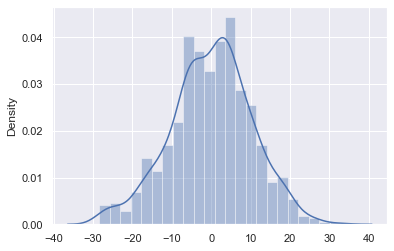

In [30]:
# orginal model
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=10)

# regression
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(endog=y_train, exog=X_incl_const)
result = model.fit()

# plotting actual value with predicted value
corr = round(y_train.corr(result.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=result.fittedvalues, alpha=0.6, color='#ff0000')
plt.plot(y_train, y_train, color = 'cyan')
plt.xlabel('strength', fontsize=14)
plt.ylabel('predicted strength', fontsize=14)
plt.title(f'strength $y _i$ vs predicted strength $\hat y_i$ (Corr:{corr})')
plt.show()

skew = round(result.resid.skew(),2)
mean = round(result.resid.mean(),2)
#plotting predicted strength vs residual
plt.figure(figsize=(10,8))
plt.scatter(x=result.fittedvalues, y=result.resid, alpha=0.4, color='#ff0000')
plt.xlabel('Predicted strength', fontsize=14)
plt.ylabel('residual strength', fontsize=14)
plt.title(f'predicted strength $\hat y_i$ vs residuals (skew:{skew},mean:{mean})')
plt.show()

# plotting distplot for residuals
sns.distplot(result.resid)
plt.show

org_model_mse = result.mse_resid
org_model_rsquared = result.rsquared

$observation:$ here in first figure predicted stength and actual strength have 0.79 correlation and positive regression.<br>
-> figure two shows that predicted and residual are the points looks randomly distributed, many point are centered to 0 in y-axis , distribution is cloud distribution meaning doesn't show any type of pattern in data except some outliers pattern and is better than above model<br>
-> figure three show distplot of residuals which is normal and doesn't have big skew

so, as the both model have similar observations we check there mse and rmse for final verdict on choosing model

In [31]:
pd.DataFrame({'rsquared':[org_model_rsquared, mod_model_rsquared],
              'mse' : [org_model_mse, mod_model_mse], 'Rmse' :np.sqrt([org_model_mse, mod_model_mse]),
             }, index=['original model', 'modified model'])

,rsquared,mse,Rmse
original model,0.621016,106.904735,10.339475
modified model,0.617277,107.563366,10.371276


$observation:$ we can see that original model is slightly better than modified model 

In [32]:
import valuation_tool as vt
vt.get_strength_estimate(14)
upperbound = round(32.20 + np.sqrt(org_model_mse),2)
lowerbound = round(32.20 - np.sqrt(org_model_mse),2)
print(f'so, the strength in confidence of 68% ranges from uppervalue of {upperbound} to lowervalue of {lowerbound}')

[[281.16563107  73.89548544  54.18713592 181.56635922   6.20311165
  972.91859223 773.5788835   45.66213592]]


NameError: name 'upperbound' is not defined

In [ ]:
target_7 = df[df["age"] == 14]
target_7.mean()

$ observation:$ so the mean of original  strength of concrete for 14 days is 28.75, while we predicted 32.20 and 28.75 is in between our interval of 42 mpa and 21 mpa

I am a beginner so there may be some mistakes in analysis that i have not found, so if you have seen the analysis and found some mistakes, please comment down below as i am learning too.<br>
Thank YOU!!